<a href="https://colab.research.google.com/github/jutourru/portfolio/blob/main/Projeto_Gerdau_Grace_Hopper_finalv1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Gerdau Challenge - Team Grace Hopper** <br>
 Maio 2022 <BR>

 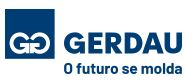





# Teste Análise de Dados
**Instruções:**
* Descreva a abordagem utilizada na resolução.
* Trechos de códigos deverão ter comentários essenciais.


## 1) Estudo do desempenho da siderurgia brasileira

A indústria do aço possui grande importância na indústria de transformação brasileira, na participação do PIB e na geração de empregos. Segundo o IABr (Instituto Aço Brasil), a produção de aço bruto brasileiro atingiu 32,6 milhões de toneladas em 2019, colocando o Brasil como o 9º maior produtor de aço no mundo. Foram 112 mil colaboradores, entre próprios e terceiros, que tornaram esse resultado possível.

https://acobrasil.org.br/


O desempenho da indústria siderúrgica depende do desempenho econômico do país. E vemos isso refletido no consumo de aço interno. Uma forma de avaliar o consumo de aço interno é através do consumo de aço aparente que é dado por:

<b>Consumo Aparente = Produção de Aço + Importação de Aço - Exportação de Aço</b>

Utilizando os dados históricos disponíveis no arquivo de excel "Performance_Mensal.xls" responda as seguintes pergutas e descreva o raciocínio utilizado.

#### **Importação e formatação dos dados**

In [ ]:
pip install --upgrade xlrd

In [ ]:
#imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#read data
dados = pd.read_excel("Performance_Mensal.xls")

In [ ]:
#format data

def format_data(dados):
  ano = dados.iloc[2]
  mes = dados.iloc[3]
  prod_aco_bruto = dados.iloc[6]
  prod_laminados = dados.iloc[7]
  prod_laminados_planos = dados.iloc[8]
  prod_laminados_longos = dados.iloc[9]

  semiacabados_para_venda =dados.iloc[10]
  semiacabados_placas = dados.iloc[11]
  semiacabados_blocos_tarugos = dados.iloc[12]
  ferro_gusa = dados.iloc[13]

  vendas_internas = dados.iloc[14]
  vendas_internas_laminados = dados.iloc[15]
  vendas_internas_laminados_planos = dados.iloc[16]
  vendas_internas_laminados_longos = dados.iloc[17]

  vendas_internas_semiabacados_para_venda = dados.iloc[18]
  vendas_internas_semiabacabados_placas = dados.iloc[19]
  vendas_internas_semiabacabados_blocos = dados.iloc[20]

  vendas_externas = dados.iloc[21]
  vendas_externas_laminados = dados.iloc[22]
  vendas_externas_laminados_planos = dados.iloc[23]
  vendas_externas_laminados_longos = dados.iloc[24]

  vendas_externas_semiabacados_para_vendas = dados.iloc[25]
  vendas_externas_semiacabados_placas = dados.iloc[26]
  vendas_externas_blocos_tarugos = dados.iloc[27]


  exportacoes_laminados = dados.iloc[30]
  exportacoes_laminados_planos = dados.iloc[31]
  exportacoes_laminados_longos = dados.iloc[32]
  exportacoes_semiacabados_para_venda = dados.iloc[33]
  exportacoes_semiacabados_placas = dados.iloc[34]
  exportacoes_semiacabados_blocos_tarugos = dados.iloc[35]
  exportacoes_total_mil = dados.iloc[36]
  exportacoes_total_milhoes = dados.iloc[37]

  importacoes_laminados = dados.iloc[39]
  importacoes_laminados_planos = dados.iloc[40]
  importacoes_laminados_longos = dados.iloc[41]
  importacoes_semiacabados_para_vendas = dados.iloc[42]
  importacoes_total_mil = dados.iloc[43]
  importacoes_total_milhoes = dados.iloc[44]
  consumo_aparente = dados.iloc[45]
  consumo_aparente_planos = dados.iloc[46]
  consumo_aparente_longos = dados.iloc[47]

  for i in range(len(mes)):
    if(mes[i] == 'Jan\nJan'):
        mes[i] = 'Janeiro'
    elif(mes[i] == 'Fev\nFeb'):
        mes[i] = 'Fevereiro'
    elif(mes[i] == 'Mar\nMar'):
        mes[i] = 'Março'
    elif(mes[i] == 'Abr\nApr'):
        mes[i] = 'Abril'
    elif(mes[i] == 'Mai\nMay'):
        mes[i] = 'Maio'
    elif(mes[i] == 'Jun\nJun'):
        mes[i] = 'Junho'
    elif(mes[i] == 'Jul\nJul'):
        mes[i] = 'Julho'
    elif(mes[i] == 'Ago\nAug'):
        mes[i] = 'Agosto'
    elif(mes[i] == 'Set\nSep'):
        mes[i] = 'Setembro'
    elif(mes[i] == 'Out\nOct'):
        mes[i] = 'Outubro'
    elif(mes[i] == 'Nov\nNov'):
        mes[i] = 'Novembro'
    elif(mes[i] == 'Dez\nDez' or mes[i] == 'Dez\nDec'):
        mes[i] = 'Dezembro'

  trimestre = []

  for i in range(0, len(mes)):
      if(mes[i] == 'Janeiro' or mes[i] == 'Fevereiro' or mes[i] == 'Março'):
          trimestre.append(1)
      elif(mes[i] == 'Abril' or mes[i] == 'Maio' or mes[i] == 'Junho'):
          trimestre.append(2)
      elif(mes[i] == 'Julho' or mes[i] == 'Agosto' or mes[i] == 'Setembro'):
          trimestre.append(3)
      elif(mes[i] == 'Outubro' or mes[i] == 'Novembro' or mes[i] == 'Dezembro'):
          trimestre.append(4)
      else:
          trimestre.append('Nan')
    
  qtd_linhas = len(ano)
  qtd_ano = int(len(ano)/12)
  qtd_ano_incompleto = len(ano)%12

  linhas = 1
  ano_atual = int(ano[linhas])

  while(qtd_ano > 0):
      for i in range(0,12):
          ano[linhas] = ano_atual
          linhas += 1
      qtd_ano -= 1
      ano_atual += 1
      

  for i in range(0,qtd_ano_incompleto-1):
      ano[linhas] = ano_atual
      linhas += 1
  
  dict = {'Ano':ano,
        'Mes':mes,
        'Trimestre':trimestre,
        'Prod Aco Bruto':prod_aco_bruto,
        'Prod Laminados':prod_laminados,
        'Prod Laminados Planos':prod_laminados_planos,
        'Prod Laminados Longos':prod_laminados_longos,
        'Semiacados P/ Venda':semiacabados_para_venda,
        'Semiacados Placas':semiacabados_placas,
        'Semiacabados Blocos e Tarugos':semiacabados_blocos_tarugos,
        'Ferro Gusa':ferro_gusa,
        'Vendas Internas':vendas_internas,
        'Vendas Internas Laminados':vendas_internas_laminados,
        'Vendas Internas Laminados Planos':vendas_internas_laminados_planos,
        'Vendas Internas Laminados Longos':vendas_internas_laminados_longos,
        'Vendas Externas':vendas_externas,
        'Vendas Externas Laminados':vendas_externas_laminados,
        'Vendas Externas Laminados Planos':vendas_externas_laminados_planos,
        'Vendas Externas Laminados Longos':vendas_externas_laminados_longos,
        'Vendas Exeternas Semiacabados P/ Venda':vendas_externas_semiabacados_para_vendas,
        'Venadas Externas Semiacabados Placas':vendas_externas_semiacabados_placas,
        'Venas Externas Semiacabados Blocos e Tarugos':vendas_externas_blocos_tarugos,
        'Exportações Laminados':exportacoes_laminados,
        'Exportações Laminados Planos':exportacoes_laminados_planos,
        'Exportações Laminados Longos':exportacoes_laminados_longos,
        'Exportações Semiacabados P/ Venda':exportacoes_semiacabados_para_venda,
        'Exportações Semiacabados Placas':exportacoes_semiacabados_placas,
        'Exportações Semiacabados Blocos e Tarugos':exportacoes_semiacabados_blocos_tarugos,
        'Exportações Total Mil t':exportacoes_total_mil,
        'Exportações Total US$ Milhões':exportacoes_total_milhoes,
        'Importações Laminados':importacoes_laminados,
        'Importações Laminados Planos':importacoes_laminados_planos,
        'Importações Laminados Longos':importacoes_laminados_longos,
        'Importações Semiacabados P/ Venda':importacoes_semiacabados_para_vendas,
        'Importações Total Mil t':importacoes_total_mil,
        'Importações Total US$ Milhões':importacoes_total_milhoes,
        'Consumo Aparente':consumo_aparente,
        'Consumo Aparente Planos':consumo_aparente_planos,
        'Consumo Aparente Longos':consumo_aparente_longos
       }

  data = pd.DataFrame(dict)
  data = data.drop(data.index[0])
  data_clear=data.reset_index(drop=True)

  return data_clear

In [ ]:
data_clear = format_data(dados)
data_clear

,Ano,Mes,Trimestre,Prod Aco Bruto,Prod Laminados,Prod Laminados Planos,Prod Laminados Longos,Semiacados P/ Venda,Semiacados Placas,Semiacabados Blocos e Tarugos,...,Exportações Total US$ Milhões,Importações Laminados,Importações Laminados Planos,Importações Laminados Longos,Importações Semiacabados P/ Venda,Importações Total Mil t,Importações Total US$ Milhões,Consumo Aparente,Consumo Aparente Planos,Consumo Aparente Longos
0,2013,Janeiro,1,2769.437,2051.441,1202.482,848.959,470.371,394.66,75.711,...,573.5,277.653,140.752,136.901,1.196,278.849,369.978,2167.705,1261.809,905.896
1,2013,Fevereiro,1,2574.894,1942.836,1144.078,798.758,480.793,417.568,63.225,...,509.969,294.211,155.913,138.298,0.16,294.371,311.089,2069.84,1195.402,874.438
2,2013,Março,1,2858.521,2194.384,1261.646,932.738,550.726,435.452,115.274,...,474.159,271.067,140.296,130.771,0.288,271.355,322.156,2330.914,1311.942,1018.972
3,2013,Abril,2,2913.622,2211.587,1233.065,978.522,459.709,386.75,72.959,...,539.518,329.344,188.103,141.241,0.523,329.867,373.559,2402.633,1367.514,1035.119
4,2013,Maio,2,2999.775,2354.716,1311.414,1043.302,442.191,346.131,96.06,...,507.626,264.948,148.586,116.362,1.496,266.444,342.873,2456.82,1403.178,1053.642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,2020,Novembro,4,2954.092,1945.154,1081.75,863.404,709.427,691.755,17.672,...,298.544,197.651,131.34,66.311,1.177,198.828,194.721,2033.502,1190.791,842.711
95,2020,Dezembro,4,2886.223,2090.405,1253.052,837.353,616.163,572.893,43.27,...,434.077,203.169,130.09,73.079,0.893,204.062,204.669,2032.196,1232.427,799.769
96,2021,Janeiro,1,3003.522,2166.727,1293.969,872.758,620.981,596.597,24.384,...,314.156,275.421,200.906,74.515,49.053,324.474,288.068,2211.07,1344.807,866.263
97,2021,Fevereiro,1,2845.184,2050.248,1211.463,838.785,556.944,537.701,19.243,...,522.292,235.588,133.079,102.509,98.282,333.87,293.092,2125.371,1237.75,887.621


### **a.** As exportações de aço brasileiras são representativas no mercado internacional, o Brasil foi o 12º maior exportador de produtos siderúrgicos em 2019. Qual foi o trimestre em que houve a maior exportação de aço? Qual foi o preço aproximado? É possivel identificar alguma relação entre preço e quantidade exportada?


####**Funções**

In [ ]:
# função para soma anual do total de exportação
def soma_anual(dados,coluna):
    soma = dados.groupby('Ano').agg({coluna: 'sum'}).reset_index()
    return soma

In [ ]:
# função para gerar gráfico da comparação entre duas variáveis
def grafico_comparacao(figura,identificador,dados,eixo_x, eixo_y1, eixo_y2):    
    figura.add_subplot(identificador)
    plt.plot(dados[eixo_x], dados[eixo_y1], linestyle='--', marker='o', color = 'blue', markersize = 4)
    plt.plot(dados[eixo_x], dados[eixo_y2], linestyle='--', marker='o', color = 'red', markersize = 4)
    plt.xlabel(eixo_x, fontsize=12)
    plt.legend([eixo_y1,eixo_y2], fontsize=11)

In [ ]:
# maiores valores anual do preço e quantidade exportada de aço
def maior_valor_anual(dados,coluna):
    valor_maior_todos_anos = dados.agg({coluna: 'max'}).reset_index()
    maior_ano = dados[dados[coluna] == valor_maior_todos_anos[0][0]]['Ano'].reset_index()
    return maior_ano.iloc[0,1],valor_maior_todos_anos[0][0]

In [ ]:
# valor exportado de aço de um único ano
def valor_ano(dados,coluna,ano):
    valor = dados[dados.Ano == ano][coluna].reset_index()
    return valor.iloc[0,1].round(2)

In [ ]:
# soma em trimestre de uma variável
def soma_trimestral(dados,coluna):
    soma_todos_trimestres = pd.DataFrame()
    soma_trimestre = dados.groupby('Ano').agg({coluna: 'sum'}).reset_index()
    soma_todos_trimestres['Ano']=soma_trimestre['Ano']
    for i in range(1, 5):
        soma_trimestre = dados[dados.Trimestre == i].groupby(
                        'Ano').agg({coluna: 'sum'}).reset_index()
        soma_trimestre = soma_trimestre.rename(
                    {coluna: '{} T{}'.format(coluna,i)}, axis=1)
        soma_todos_trimestres['{} T{}'.format(coluna,i)]=soma_trimestre['{} T{}'.format(coluna,i)]
    return soma_todos_trimestres

In [ ]:
# função para criar um gráfico de algum valor da base em trimestre
def grafico_trimestral(soma_todos_trimestres,coluna):
    plt.figure(figsize=(10, 5))
    plt.plot(soma_todos_trimestres['Ano'], soma_todos_trimestres[soma_todos_trimestres.columns[1]], linestyle='--', marker='o', color = 'blue', markersize = 4)
    plt.plot(soma_todos_trimestres['Ano'], soma_todos_trimestres[soma_todos_trimestres.columns[2]], linestyle='--', marker='o', color = 'red', markersize = 4)
    plt.plot(soma_todos_trimestres['Ano'], soma_todos_trimestres[soma_todos_trimestres.columns[3]], linestyle='--', marker='o', color = 'green', markersize = 4)
    plt.plot(soma_todos_trimestres['Ano'], soma_todos_trimestres[soma_todos_trimestres.columns[4]], linestyle='--', marker='o', color = 'pink', markersize = 4)
    plt.xlabel('Anos', fontsize=15)
    plt.ylabel(coluna, fontsize=15)
    plt.legend(['1º Trimestre','2º Trimestre','3º Trimestre','4º Trimestre'], fontsize=14)
    axes = plt.gca()
    axes.yaxis.grid(b=True, color='black', alpha=0.3, linestyle='-.', linewidth=1)
    plt.show()

In [ ]:
# maior valor entre os trimestres do ano
def maior_trimestre_de_cada_ano(soma_todos_trimestres):
    soma_todos_trimestres['Maior Trimestre'] = soma_todos_trimestres.iloc[:,1:].fillna(0).max(axis=1)
    return soma_todos_trimestres

In [ ]:
# função para localizar trimestre de maior valor de todos os anos registrados, retornando o trimestre, ano e valor
def maior_trimestre_dos_anos(dados,coluna):
    localizacao_maior_valor = pd.DataFrame()
    index_todos_anos = 0 
    maior_valor = dados.agg({'Maior Trimestre': 'max'}).reset_index()

    while (localizacao_maior_valor.size == 0):
        index_todos_anos = index_todos_anos + 1
        localizacao_maior_valor = dados[dados['{} T{}'.format(coluna,index_todos_anos)] == maior_valor[0][0]]
    
    return index_todos_anos,localizacao_maior_valor.iloc[0,0],maior_valor[0][0].round(2)

In [ ]:
# função para localizar o maior valor trimestral de aço de um único ano
def maior_trimestre_do_ano(dados,coluna,ano):
    localizacao_maior_valor = pd.DataFrame()
    index = 0 
    maior_trimestre = dados[dados.Ano == ano].iloc[:,1:].fillna(0).max(axis=1).reset_index()
    while (localizacao_maior_valor.size == 0):
        index = index + 1   
        localizacao_maior_valor = dados[dados['{} T{}'.format(coluna,index)] == maior_trimestre[0][0]]

    return index,maior_trimestre[0][0]

####**Ano que houve a maior valor em exportação de aço**:

In [ ]:
# soma anual do total de exportação em toneladas
toneladas = soma_anual(data_clear,'Exportações Total Mil t')
# soma anual do total do preço da exportação em dolar
dolar = soma_anual(data_clear,'Exportações Total US$ Milhões')

In [ ]:
# união dos totais de toneladas e preço em dolar
toneladas_dolar = toneladas.merge(dolar, on='Ano', how='outer')
toneladas_dolar

,Ano,Exportações Total Mil t,Exportações Total US$ Milhões
0,2013,8090.640000,5567.386000
1,2014,9780.952000,6808.335000
2,2015,13726.000000,6585.000000
3,2016,13432.000000,5594.000000
4,2017,15351.000000,8046.000000
5,2018,13945.000000,8874.000000
6,2019,12804.816000,7307.965000
7,2020,10742.040000,5363.412000
8,2021,1340.856073,902.700435


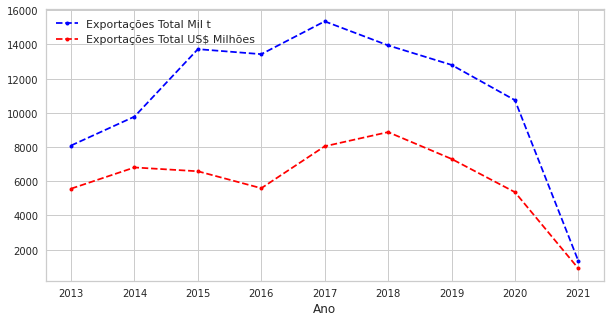

In [ ]:
# gráfico de comparação entre a quantidade e preço total exportado
fig=plt.figure(figsize=(10, 5))
grafico_comparacao(fig,111,toneladas_dolar,toneladas_dolar.columns[0], toneladas_dolar.columns[1],toneladas_dolar.columns[2])

In [ ]:
# ano que teve a maior quantidade de exportação em toneladas
ano_toneladas, maior_valor_anual_toneladas = maior_valor_anual(toneladas_dolar,toneladas_dolar.columns[1])
print("O ano que mais exportou em quantidade de aço foi {}, totalizando {} mil toneladas.".format(ano_toneladas, maior_valor_anual_toneladas))
# ano que teve a maior quantidade de exportação em dolar
ano_dolar, maior_valor_anual_dolar = (maior_valor_anual(toneladas_dolar,toneladas_dolar.columns[2]))
print("O ano que mais faturou em exportação de aço foi {}, totalizando US$ {} milhões.".format(ano_dolar, maior_valor_anual_dolar))

O ano que mais exportou em quantidade de aço foi 2017, totalizando 15351.0 mil toneladas.
O ano que mais faturou em exportação de aço foi 2018, totalizando US$ 8874.0 milhões.


In [ ]:
# quantidade e preço da exportação de aço em 2019 em toneladas
valor_toneladas_2019 = valor_ano(toneladas_dolar,toneladas_dolar.columns[1],2019)
print("Em 2019 foi exportado um total de {} mil toneladas de aço e rebeceu US$ {} milhões.".format(valor_toneladas_2019,valor_dolar_2019))

Em 2019 foi exportado um total de 12804.82 mil toneladas de aço e rebeceu US$ 7307.96 milhões.


####**Qual foi o trimestre em que houve a maior exportação de aço?**

In [ ]:
# soma em trimestre da quantidade de aço exportado em toneladas
soma_todos_trimestres_toneladas = soma_trimestral(data_clear,'Exportações Total Mil t')
soma_todos_trimestres_toneladas

,Ano,Exportações Total Mil t T1,Exportações Total Mil t T2,Exportações Total Mil t T3,Exportações Total Mil t T4
0,2013,2466.755,1967.943,1683.369,1972.573
1,2014,1995.544,1928.358,2832.753,3024.297
2,2015,2782.000,2949.000,4312.000,3683.000
3,2016,3257.000,3428.000,3382.000,3365.000
4,2017,3822.000,3478.000,3703.000,4348.000
5,2018,3578.000,3302.000,2641.000,4424.000
6,2019,3291.510,3398.041,2872.202,3243.063
7,2020,3248.180,2898.589,2472.268,2123.003
8,2021,1296.721,NaN,NaN,NaN


In [ ]:
# soma em trimestre do preço de aço exportado em dolar
soma_todos_trimestres_dolar = soma_trimestral(data_clear,'Exportações Total US$ Milhões')
soma_todos_trimestres_dolar

,Ano,Exportações Total US$ Milhões T1,Exportações Total US$ Milhões T2,Exportações Total US$ Milhões T3,Exportações Total US$ Milhões T4
0,2013,1557.628,1433.323,1202.835,1373.600
1,2014,1451.295,1461.014,1954.826,1941.200
2,2015,1765.000,1518.000,1880.000,1422.000
3,2016,1189.000,1360.000,1579.000,1466.000
4,2017,1850.000,1849.000,1911.000,2436.000
5,2018,2153.000,2139.000,1819.000,2763.000
6,2019,1954.465,2061.589,1642.520,1649.391
7,2020,1638.609,1423.620,1152.143,1149.040
8,2021,836.448,NaN,NaN,NaN


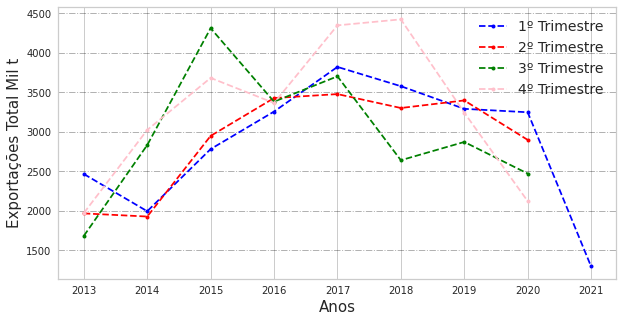

In [ ]:
# gráfico da quantidade em toneladas de aço exportado divido em trimestre
grafico_trimestral(soma_todos_trimestres_toneladas,toneladas_dolar.columns[1])

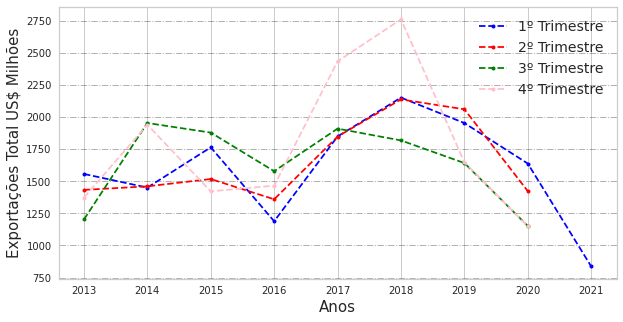

In [ ]:
# gráfico do preço em dolar do aço exportado divido em trimestre
grafico_trimestral(soma_todos_trimestres_dolar,toneladas_dolar.columns[2])

In [ ]:
# maior valor de quantidade de toneladas de aço exportado entre trimestres de cada ano
soma_todos_trimestres_toneladas = maior_trimestre_de_cada_ano(soma_todos_trimestres_toneladas)
soma_todos_trimestres_toneladas

,Ano,Exportações Total Mil t T1,Exportações Total Mil t T2,Exportações Total Mil t T3,Exportações Total Mil t T4,Maior Trimestre
0,2013,2466.755,1967.943,1683.369,1972.573,2466.755
1,2014,1995.544,1928.358,2832.753,3024.297,3024.297
2,2015,2782.000,2949.000,4312.000,3683.000,4312.000
3,2016,3257.000,3428.000,3382.000,3365.000,3428.000
4,2017,3822.000,3478.000,3703.000,4348.000,4348.000
5,2018,3578.000,3302.000,2641.000,4424.000,4424.000
6,2019,3291.510,3398.041,2872.202,3243.063,3398.041
7,2020,3248.180,2898.589,2472.268,2123.003,3248.180
8,2021,1296.721,NaN,NaN,NaN,1296.721


In [ ]:
# maior valor do preço em dolar do aço exportado entre trimestres de cada ano
soma_todos_trimestres_dolar = maior_trimestre_de_cada_ano(soma_todos_trimestres_dolar)
soma_todos_trimestres_dolar

,Ano,Exportações Total US$ Milhões T1,Exportações Total US$ Milhões T2,Exportações Total US$ Milhões T3,Exportações Total US$ Milhões T4,Maior Trimestre
0,2013,1557.628,1433.323,1202.835,1373.600,1557.628
1,2014,1451.295,1461.014,1954.826,1941.200,1954.826
2,2015,1765.000,1518.000,1880.000,1422.000,1880.000
3,2016,1189.000,1360.000,1579.000,1466.000,1579.000
4,2017,1850.000,1849.000,1911.000,2436.000,2436.000
5,2018,2153.000,2139.000,1819.000,2763.000,2763.000
6,2019,1954.465,2061.589,1642.520,1649.391,2061.589
7,2020,1638.609,1423.620,1152.143,1149.040,1638.609
8,2021,836.448,NaN,NaN,NaN,836.448


In [ ]:
# retorno do trimestre que teve o maior valor exportado em toneladas
maior_trimestre_toneladas,ano_do_maior_trimestre,maior_valor_toneladas = maior_trimestre_dos_anos(soma_todos_trimestres_toneladas,'Exportações Total Mil t')
print('O trimestre que teve maior quantidade de aço exportado foi o {}º de {}, com {} mil toneladas.'.format(maior_trimestre_toneladas,ano_do_maior_trimestre,maior_valor_toneladas))
# retorno do trimestre que teve o maior valor exportado em dolar
maior_trimestre_dolar,ano_do_maior_trimestre,maior_valor_dolar = maior_trimestre_dos_anos(soma_todos_trimestres_dolar,'Exportações Total US$ Milhões')
print('O trimestre que teve maior valor recebido de aço exportado também foi o {}º de {}, com US$ {} milhões.'.format(maior_trimestre_dolar,ano_do_maior_trimestre,maior_valor_dolar))

O trimestre que teve maior quantidade de aço exportado foi o 4º de 2018, com 4424.0 mil toneladas.
O trimestre que teve maior valor recebido de aço exportado também foi o 4º de 2018, com US$ 2763.0 milhões.


In [ ]:
# retorno do trimestre que teve o maior valor exportado em toneladas do ano de 2019
maior_trimestre_toneladas_2019,maior_valor_toneladas_2019 = maior_trimestre_do_ano(soma_todos_trimestres_toneladas,'Exportações Total Mil t',2019)
# retorno do trimestre que teve o maior valor exportado em dolar do ano de 2019
maior_trimestre_dolar_2019, maior_valor_dolar_2019 = maior_trimestre_do_ano(soma_todos_trimestres_dolar,'Exportações Total US$ Milhões',2019)
print('Em 2019 o maior trimestre exportado de aço foi o {}º, com {} mil toneladas, com valor total recebido de US$ {} milhões.'.format(maior_trimestre_toneladas_2019,maior_valor_toneladas_2019,maior_valor_dolar_2019))

Em 2019 o maior trimestre exportado de aço foi o 2º, com 3398.041 mil toneladas, com valor total recebido de US$ 2061.589 milhões.


#### **Qual foi o preço aproximado?**

In [ ]:
# conclusão e média do preço
media_preco_tonelada = ((maior_valor_dolar*1000000)/(maior_valor_toneladas*1000)).round(2)
media_preco_tonelada_2019 = ((maior_valor_dolar_2019*1000000)/(maior_valor_toneladas_2019*1000)).round(2)

print("""De acordo com os dados apresentados, o ano que mais exportou foi {} com {} mil toneladas de aço, em contrapatida o ano que teve maior rendimento foi {}, com US$ {} milhões. 
Em 2019 a quantidade exportada de aço foi {} mil toneladas, com o preço total de US$ {} milhões.
O {}º trimestre de {} teve o maior valor em exportação de aço entre todos os anos, tanto em quantidade, quanto em preço, foram {} mil toneladas, com um total de US$ {} milhões. O preço aproximado nesse período foi de US$ {} por tonelada.
Já no ano de 2019 os valores foram menores, seu maior trimestre foi o {}º, com {} mil toneladas de aço exportado, um rendimento de US$ {} milhóes, e média de US$ {} por tonelada.
""".format(ano_toneladas, maior_valor_anual_toneladas,ano_dolar, maior_valor_anual_dolar, valor_toneladas_2019,valor_dolar_2019,maior_trimestre_toneladas,ano_do_maior_trimestre,maior_valor_toneladas,maior_valor_dolar,media_preco_tonelada,maior_trimestre_toneladas_2019,maior_valor_toneladas_2019,maior_valor_dolar_2019,media_preco_tonelada_2019))

De acordo com os dados apresentados, o ano que mais exportou foi 2017 com 15351.0 mil toneladas de aço, em contrapatida o ano que teve maior rendimento foi 2018, com US$ 8874.0 milhões. 
Em 2019 a quantidade exportada de aço foi 12804.82 mil toneladas, com o preço total de US$ 7307.96 milhões.
O 4º trimestre de 2018 teve o maior valor em exportação de aço entre todos os anos, tanto em quantidade, quanto em preço, foram 4424.0 mil toneladas, com um total de US$ 2763.0 milhões. O preço aproximado nesse período foi de US$ 624.55 por tonelada.
Já no ano de 2019 os valores foram menores, seu maior trimestre foi o 2º, com 3398.041 mil toneladas de aço exportado, um rendimento de US$ 2061.589 milhóes, e média de US$ 606.7 por tonelada.



#### **É possivel identificar alguma relação entre preço e quantidade exportada?**

In [ ]:
# seleção da coluna de preço e de quantidade
correlacao = data_clear[['Exportações Total Mil t','Exportações Total US$ Milhões']]
# informação das variáveis
correlacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Exportações Total Mil t        99 non-null     object
 1   Exportações Total US$ Milhões  99 non-null     object
dtypes: object(2)
memory usage: 1.7+ KB


In [ ]:
# para a correlação, neste caso, se faz necessário a transformação para tipo numérico
correlacao = correlacao.astype(float, errors = 'raise')
correlacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Exportações Total Mil t        99 non-null     float64
 1   Exportações Total US$ Milhões  99 non-null     float64
dtypes: float64(2)
memory usage: 1.7 KB


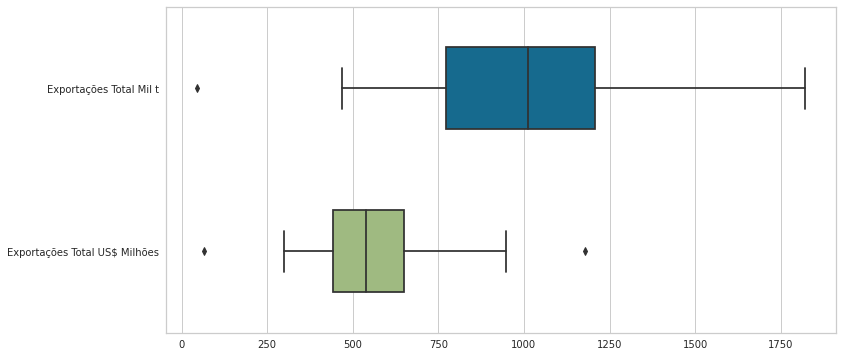

In [ ]:
# verificando se os dados possuem discrepância
ax = sns.boxplot(data=correlacao, orient='h', width=0.5)
ax.figure.set_size_inches(12, 6)
ax;

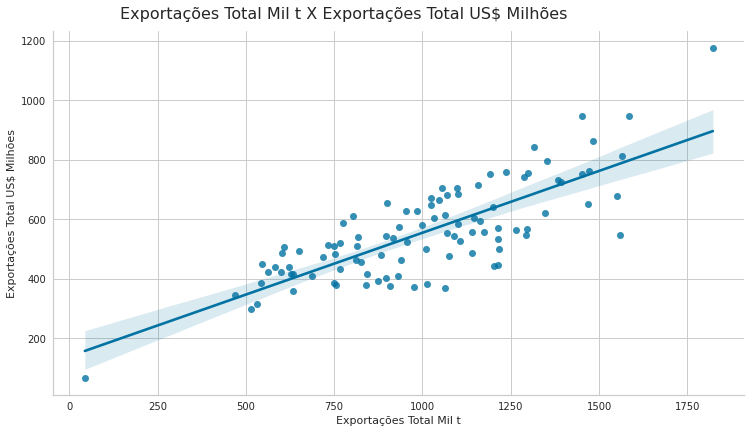

In [ ]:
# gráfico para visualizar se as colunas estão correlacionadas
ax = sns.lmplot(x = 'Exportações Total Mil t', y ='Exportações Total US$ Milhões', data=correlacao)
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle('Exportações Total Mil t X Exportações Total US$ Milhões', fontsize=16, y=1.02)
ax;

In [ ]:
# matriz de correlação
matriz_corr = correlacao.corr().reset_index()
matriz_corr

,index,Exportações Total Mil t,Exportações Total US$ Milhões
0,Exportações Total Mil t,1.000000,0.791109
1,Exportações Total US$ Milhões,0.791109,1.000000


In [ ]:
# conclusão
# fonte: https://psicometriaonline.com.br/o-que-e-correlacao-de-pearson/
print("""É possível medir a intensidade da relação linear, se ela é mais forte ou se ela é mais fraca, vendo numericamente. O coeficiente de correlação vai variar de -1 a 1, onde perto desses extremos, -1 e 1, indicam relações mais fortes entre as duas variáveis, relações lineares.

Cohen (1992) sugere os seguintes tamanhos de efeito:
* r = |0,10| -> correlação fraca.
* r = |0,30| -> correlação moderada.
* r = |0,50| -> correlação forte.

O artigo “How to Interpret a Correlation Coefficient r – dummies” (2019) sugere que:
* r = |0,30| -> correlação fraca
* r = |0,50| -> correlação moderada
* r = |0,70| -> correlação forte

Sendo assim, o preço e a quantidade de aço exportado estão correlacionados fortemente com {}.""".format(matriz_corr.iloc[0,2].round(4)))

É possível medir a intensidade da relação linear, se ela é mais forte ou se ela é mais fraca, vendo numericamente. O coeficiente de correlação vai variar de -1 a 1, onde perto desses extremos, -1 e 1, indicam relações mais fortes entre as duas variáveis, relações lineares.

Cohen (1992) sugere os seguintes tamanhos de efeito:
* r = |0,10| -> correlação fraca.
* r = |0,30| -> correlação moderada.
* r = |0,50| -> correlação forte.

O artigo “How to Interpret a Correlation Coefficient r – dummies” (2019) sugere que:
* r = |0,30| -> correlação fraca
* r = |0,50| -> correlação moderada
* r = |0,70| -> correlação forte

Sendo assim, o preço e a quantidade de aço exportado estão correlacionados fortemente com 0.7911.


### **b.** Dado que o desempenho da siderurgia está ligado ao desempenho econômico do país, utilize a série histórica do consumo aparente de aço brasileiro e faça uma análise exploratória, explicando as mudanças de tendência observadas.

#### **Funções**

In [ ]:
# função para apresentar um gráfico de compararação proporcinal entre duas colunas do mesmo dataframe
def grafico_comparacao_proporcional(dados,eixo_x, eixo_y1, eixo_y2, titulo):
    ax1 = plt.subplot()  
    ax1.set_xlabel(eixo_x, fontsize = 14)  
    ax1.set_ylabel(eixo_y1, color = 'blue', fontsize = 14)  
    ax1.plot(dados[eixo_x], dados[eixo_y1],linestyle='--', marker='o', color = 'blue', markersize = 4)  
    ax1.tick_params(axis ='y', labelcolor = 'blue', size =12)  
    ax2 = ax1.twinx()  
    ax2.set_ylabel(eixo_y2, color = 'red', fontsize = 14)  
    ax2.plot(dados[eixo_x], dados[eixo_y2], linestyle='--', marker='o', color = 'red', markersize = 4)  
    ax2.tick_params(axis ='y', labelcolor = 'red',  size =12)  
    ax1.grid() 
    plt.title(titulo, fontweight ="bold",fontsize = 15) 
    plt.show()

#### **Análise exploratória do consumo aparente e suas principais correlações**

In [ ]:
# verificando quais são as variáveis(colunas) e seus tipos
data_clear.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 39 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   Ano                                           99 non-null     object
 1   Mes                                           98 non-null     object
 2   Trimestre                                     99 non-null     object
 3   Prod Aco Bruto                                99 non-null     object
 4   Prod Laminados                                99 non-null     object
 5   Prod Laminados Planos                         99 non-null     object
 6   Prod Laminados Longos                         99 non-null     object
 7   Semiacados P/ Venda                           99 non-null     object
 8   Semiacados Placas                             99 non-null     object
 9   Semiacabados Blocos e Tarugos                 99 non-null     object
 10  Ferr

In [ ]:
# para obter o resultado de uma correlação ou dados estatísticos, neste caso, se faz necessário que estas informações estejam em formato numérico
data_float = data_clear.drop( columns=['Mes'], axis=1)
data_float = data_float.astype(float, errors = 'raise')
data_float.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 38 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Ano                                           99 non-null     float64
 1   Trimestre                                     98 non-null     float64
 2   Prod Aco Bruto                                99 non-null     float64
 3   Prod Laminados                                99 non-null     float64
 4   Prod Laminados Planos                         99 non-null     float64
 5   Prod Laminados Longos                         99 non-null     float64
 6   Semiacados P/ Venda                           99 non-null     float64
 7   Semiacados Placas                             99 non-null     float64
 8   Semiacabados Blocos e Tarugos                 99 non-null     float64
 9   Ferro Gusa                                    99 non-null     float

In [ ]:
# correlação de todas as colunas com o Consumo Aparente
correlacao_consumo_aparente = data_float.corr()['Consumo Aparente'].reset_index()
correlacao_consumo_aparente

,index,Consumo Aparente
0,Ano,-0.476087
1,Trimestre,-0.022768
2,Prod Aco Bruto,0.639228
3,Prod Laminados,0.857631
4,Prod Laminados Planos,0.743522
5,Prod Laminados Longos,0.861837
6,Semiacados P/ Venda,-0.293192
7,Semiacados Placas,-0.267274
8,Semiacabados Blocos e Tarugos,-0.211210
9,Ferro Gusa,0.444111


In [ ]:
# correlação em ordem decrescente para verificar as variáveis que possuem maior correlação
correlacao_consumo_aparente = correlacao_consumo_aparente.sort_values(['Consumo Aparente'],ascending=False)
correlacao_consumo_aparente.rename(columns={'index':'Categoria','Consumo Aparente':'Correlação'},inplace=True)
correlacao_consumo_aparente.reset_index(drop=True,inplace=True)
correlacao_consumo_aparente

,Categoria,Correlação
0,Consumo Aparente,1.000000
1,Vendas Internas,0.984071
2,Vendas Internas Laminados,0.984024
3,Consumo Aparente Planos,0.979833
4,Consumo Aparente Longos,0.964226
5,Vendas Internas Laminados Longos,0.959109
6,Vendas Internas Laminados Planos,0.943504
7,Prod Laminados Longos,0.861837
8,Prod Laminados,0.857631
9,Importações Total US$ Milhões,0.837041


Text(0.5, 1.0, 'Correlações sobre o Consumo Aparente')

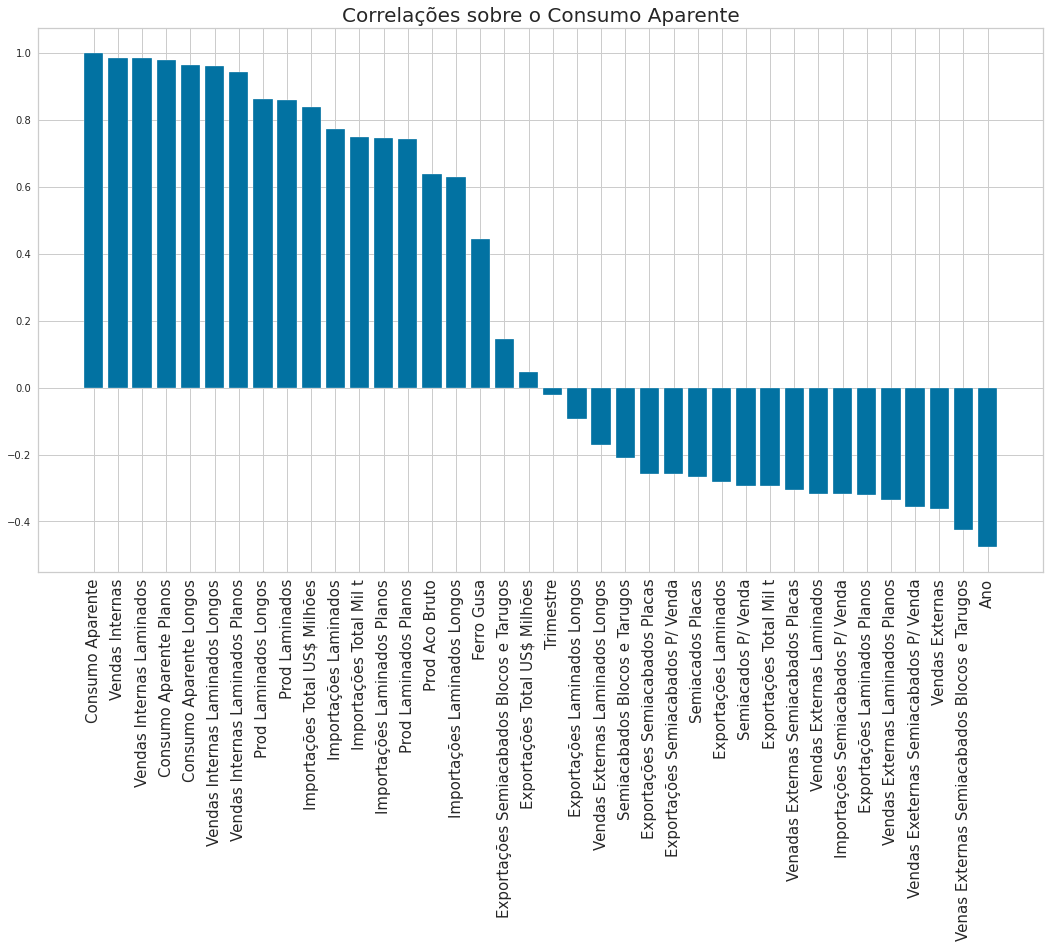

In [ ]:
# correlações apresentados em gráfico
plt.figure(figsize=(18, 10))
plt.bar(correlacao_consumo_aparente['Categoria'],correlacao_consumo_aparente['Correlação'])
plt.xticks(correlacao_consumo_aparente['Categoria'],rotation=90,fontsize=15);
plt.title('Correlações sobre o Consumo Aparente',fontsize=20) 


In [ ]:
# tipos das variáveis
correlacao_consumo_aparente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Categoria   38 non-null     object 
 1   Correlação  38 non-null     float64
dtypes: float64(1), object(1)
memory usage: 736.0+ bytes


In [ ]:
# colunas que possuem importante correlação com o consumo aparente
forte_correlacao = data_clear[['Ano','Consumo Aparente','Vendas Internas', 'Prod Laminados','Importações Total US$ Milhões','Importações Total Mil t','Exportações Total Mil t','Exportações Total US$ Milhões']]
forte_correlacao = forte_correlacao.groupby('Ano').agg({'Consumo Aparente':'sum','Vendas Internas':'sum', 'Prod Laminados':'sum','Importações Total US$ Milhões':'sum','Importações Total Mil t':'sum','Exportações Total Mil t':'sum','Exportações Total US$ Milhões':'sum'}).reset_index()
# exclusão do ano de 2021, dados estão incompletos
forte_correlacao = forte_correlacao.drop(forte_correlacao.shape[0]-1)
forte_correlacao

,Ano,Consumo Aparente,Vendas Internas,Prod Laminados,Importações Total US$ Milhões,Importações Total Mil t,Exportações Total Mil t,Exportações Total US$ Milhões
0,2013,28017.958,24387.288,26263.127,4281.424,3704.049,8090.640,5567.386
1,2014,25605.659,21708.838,24905.355,4109.057,3977.732,9780.952,6808.335
2,2015,21295.000,18173.000,22671.000,3110.000,3210.000,13726.000,6585.000
3,2016,18520.000,16828.000,21121.000,1683.000,1879.000,13432.000,5594.000
4,2017,19523.000,17247.000,22690.000,2232.000,2329.000,15351.000,8046.000
5,2018,21207.000,18920.000,23696.000,2610.000,2407.000,13945.000,8874.000
6,2019,20976.555,18798.943,22487.483,2462.967,2365.147,12804.816,7307.965
7,2020,21224.745,19249.090,21664.011,2142.824,2026.265,10742.040,5363.412


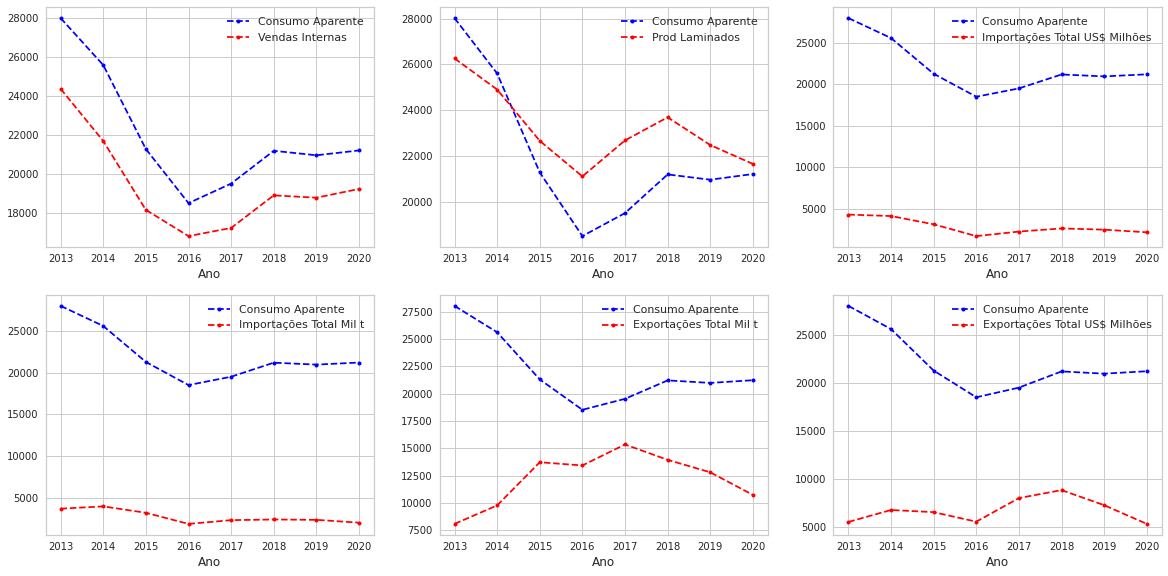

In [ ]:
# comparação entre variáveis mais importantes correlacionadas com o consumo aparente
fig = plt.figure(figsize=(20, 15))
grafico_comparacao(fig,331,forte_correlacao,forte_correlacao.columns[0],forte_correlacao.columns[1],forte_correlacao.columns[2])
grafico_comparacao(fig,332,forte_correlacao,forte_correlacao.columns[0],forte_correlacao.columns[1],forte_correlacao.columns[3])
grafico_comparacao(fig,333,forte_correlacao,forte_correlacao.columns[0],forte_correlacao.columns[1],forte_correlacao.columns[4])
grafico_comparacao(fig,334,forte_correlacao,forte_correlacao.columns[0],forte_correlacao.columns[1],forte_correlacao.columns[5])
grafico_comparacao(fig,335,forte_correlacao,forte_correlacao.columns[0],forte_correlacao.columns[1],forte_correlacao.columns[6])
grafico_comparacao(fig,336,forte_correlacao,forte_correlacao.columns[0],forte_correlacao.columns[1],forte_correlacao.columns[7])

#### **Leitura de arquivos externo para análise**

In [ ]:
# leitura de outro arquivo, com informações anuais sobre o cambio
# fonte:http://www.ipeadata.gov.br/ExibeSerie.aspx?serid=31924
cambio = pd.read_excel("cambio.xls")
cambio

,Data,Taxa de câmbio - R$ / US$ - comercial - venda - média
0,1889,7.272700e-16
1,1890,6.909100e-16
2,1891,4.363600e-16
3,1892,1.200000e-15
4,1893,1.490900e-15
...,...,...
128,2017,3.192000e+00
129,2018,3.654200e+00
130,2019,3.945100e+00
131,2020,5.155800e+00


In [ ]:
# leitura de outro arquivo, com informações anuais sobre o PIB
# fonte: https://infograficos.gazetadopovo.com.br/economia/pib-do-brasil/
pib = pd.read_excel("pib.xls")
pib

,Ano,PIB do Brasil (Var. % anual)
0,2021,0.0460
1,2020,-0.0388
2,2019,0.0114
3,2018,0.0112
4,2017,0.0106
5,2016,-0.0331
6,2015,-0.0355
7,2014,0.0050
8,2013,0.0300
9,2012,0.0192


In [ ]:
# leitura de outro arquivo, com informações anuais sobre o dolar
# fonte: https://www.aasp.org.br/suporte-profissional/indices-economicos/atualizacao-mensal/dolar/
dolar = pd.read_excel("dolar.xls")
dolar

,Ano/Mês,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez
0,2022,5.71270,5.5349,5.1881,5.1314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021,5.09680,5.2714,5.3815,5.6296,5.6234,5.2701,5.0874,5.1000,5.2474,5.2576,5.4510,5.4199
2,2020,4.09490,4.1622,4.3163,4.7362,5.2579,5.8229,5.1883,5.3491,5.3852,5.2728,5.6172,5.4854
3,2019,3.90900,3.7049,3.7155,3.8344,3.8730,4.0031,3.8813,3.7463,4.0188,4.0616,4.1488,4.1831
4,2018,3.31820,3.1963,3.2208,3.2859,3.4105,3.6753,3.7738,3.8745,3.9134,4.1879,3.7332,3.7924
5,2017,3.38300,3.2034,3.0779,3.1629,3.1269,3.1011,3.2836,3.1899,3.1976,3.1255,3.1572,3.2834
6,2016,3.87110,3.9885,3.7116,3.5276,3.5041,3.4768,3.2656,3.1672,3.3326,3.1864,3.4446,3.3830
7,2015,2.61220,2.8392,3.2264,3.0681,2.9894,3.1036,3.1532,3.4761,3.8599,3.8344,3.8023,3.8703
8,2014,2.34700,2.3924,2.3638,2.2257,2.2166,2.2347,2.2195,2.2690,2.3401,2.4316,2.6136,2.6717
9,2013,2.03740,1.9600,1.9749,1.9790,2.0233,2.1367,2.2548,2.3434,2.2785,2.1818,2.3289,2.3354


In [ ]:
# adição de uma coluna que faz a média do preço do dolar mensal de cada ano
dolar['Média Dolar'] = dolar.iloc[:,1:].mean(axis=1)
# utilização das colunas ano e a média do dataframe do dolar
dolar_anual = pd.DataFrame()
dolar_anual[["Ano","Média Dólar (US$)"]] = dolar[["Ano/Mês","Média Dolar"]]
dolar_anual

,Ano,Média Dólar (US$)
0,2022,5.391775
1,2021,5.319675
2,2020,5.057367
3,2019,3.923317
4,2018,3.615183
5,2017,3.191033
6,2016,3.488258
7,2015,3.319592
8,2014,2.360475
9,2013,2.152842


#### **Correlação do consumo aparente com os arquivos externos:**

In [ ]:
# soma anual do consumo aparente
consumo_aparente = data_clear[['Ano', 'Consumo Aparente']]
consumo_aparente = consumo_aparente.groupby('Ano').agg({'Consumo Aparente':'sum'}).reset_index()
# exclusão do ano de 2021, dados estão incompletos
consumo_aparente = consumo_aparente.drop(consumo_aparente.shape[0]-1)
consumo_aparente

,Ano,Consumo Aparente
0,2013,28017.958
1,2014,25605.659
2,2015,21295.000
3,2016,18520.000
4,2017,19523.000
5,2018,21207.000
6,2019,20976.555
7,2020,21224.745


In [ ]:
# transformação da unidade do consumo aparente em taxa de crescimento
consumo_aparente_taxa = consumo_aparente.copy()
for i in range(1,consumo_aparente.shape[0]):
    consumo_aparente_taxa.loc[i,'Consumo Aparente'] = (consumo_aparente.loc[i,'Consumo Aparente']-consumo_aparente.loc[i-1,'Consumo Aparente'])/consumo_aparente.loc[i-1,'Consumo Aparente']
consumo_aparente_taxa = consumo_aparente_taxa.drop(0)
consumo_aparente_taxa.rename(columns={"Consumo Aparente": "Consumo Aparente (Var. % anual)"}, inplace = True)
consumo_aparente_taxa

,Ano,Consumo Aparente (Var. % anual)
1,2014,-0.086098
2,2015,-0.168348
3,2016,-0.130312
4,2017,0.054158
5,2018,0.086257
6,2019,-0.010866
7,2020,0.011832


In [ ]:
# união através dos anos do dataframe de consumo aparente em variação percentual com o pib também com a mesma unidade de medida
consumo_pib_taxa = consumo_aparente_taxa.merge(pib,on='Ano', how='inner')
# união através dos anos do cambio com o valor do consumo aparente
cambio.rename(columns={"Data": "Ano", "Taxa de câmbio - R$ / US$ - comercial - venda - média":"Taxa de câmbio (R$ / US$)"}, inplace = True)
consumo_cambio = consumo_aparente.merge(cambio,on='Ano', how='inner')
# adição da média do dolar anaual com o cambio e consumo aparente 
consumo_cambio_dolar = consumo_cambio.merge(dolar_anual,on='Ano', how='inner')
consumo_cambio_dolar

,Ano,Consumo Aparente,Taxa de câmbio (R$ / US$),Média Dólar (US$)
0,2013,28017.958,2.1576,2.152842
1,2014,25605.659,2.3534,2.360475
2,2015,21295.000,3.3315,3.319592
3,2016,18520.000,3.4901,3.488258
4,2017,19523.000,3.1920,3.191033
5,2018,21207.000,3.6542,3.615183
6,2019,20976.555,3.9451,3.923317
7,2020,21224.745,5.1558,5.057367


In [ ]:
# verificando informações das variáveis
consumo_cambio_dolar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Ano                        8 non-null      int64  
 1   Consumo Aparente           8 non-null      float64
 2   Taxa de câmbio (R$ / US$)  8 non-null      float64
 3   Média Dólar (US$)          8 non-null      float64
dtypes: float64(3), int64(1)
memory usage: 320.0 bytes


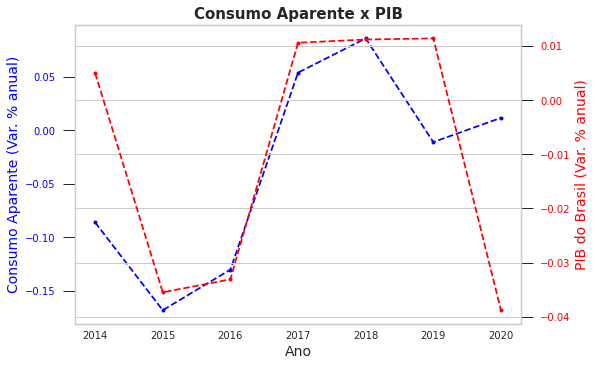

In [ ]:
# grafico de comparação entre a variação do consumo aparente e o PIB
grafico_comparacao_proporcional(consumo_pib_taxa,consumo_pib_taxa.columns[0],consumo_pib_taxa.columns[1],consumo_pib_taxa.columns[2],'Consumo Aparente x PIB')

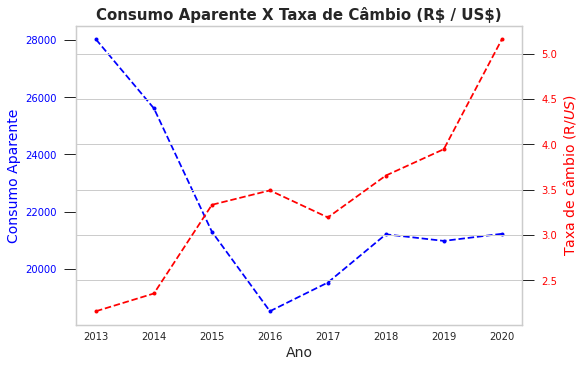

In [ ]:
# grafico de comparação entre o valor do consumo aparente e o câmbio
grafico_comparacao_proporcional(consumo_cambio_dolar,consumo_cambio_dolar.columns[0],consumo_cambio_dolar.columns[1],consumo_cambio_dolar.columns[2],'Consumo Aparente X Taxa de Câmbio (R\$ / US\$)')

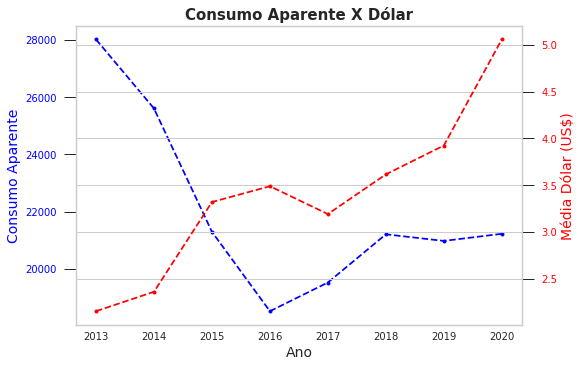

In [ ]:
# grafico de comparação entre o valor do consumo aparente e o dolar
grafico_comparacao_proporcional(consumo_cambio_dolar,consumo_cambio_dolar.columns[0],consumo_cambio_dolar.columns[1],consumo_cambio_dolar.columns[3],'Consumo Aparente X Dólar')

In [ ]:
# matriz de correlação entre o valor do consumo aparente com o valor do dolar e cambio
corr_consumo_pib_cambio_dolar = consumo_cambio_dolar.corr()['Consumo Aparente'].reset_index()
corr_consumo_pib_cambio_dolar

,index,Consumo Aparente
0,Ano,-0.644109
1,Consumo Aparente,1.000000
2,Taxa de câmbio (R$ / US$),-0.632151
3,Média Dólar (US$),-0.645075


In [ ]:
# matriz de correlação entre a taxa percentual anual do consumo aparente com o PIB
corr_consumo_pib_taxa = consumo_pib_taxa.corr()['Consumo Aparente (Var. % anual)'].reset_index()
corr_consumo_pib_taxa

,index,Consumo Aparente (Var. % anual)
0,Ano,0.665640
1,Consumo Aparente (Var. % anual),1.000000
2,PIB do Brasil (Var. % anual),0.600732


#### **Explicação das mudanças de tendência observadas**

In [ ]:
# conclusão
# fonte: https://agenciabrasil.ebc.com.br/economia/noticia/2017-01/crise-economica-leva-industria-do-aco-adiar-investimentos-u-32-bilhoes
# fonte11: https://www.gov.br/fazenda/pt-br/assuntos/balanco-e-perspectivas
print("""No geral o consumo aparente está fortemente relacionado com 4 categorias:
        -> {} com uma correlação de {}; 
        -> {} com uma correlação de {}; 
        -> {} com uma correlação de {}; 
        -> {} com uma correlação de {}.
Os valores de exportação apresentam uma baixa correlação:
        -> {} com uma correlação de {}; 
        -> {} com uma correlação de {}; 
O que comprova a forma de avaliar o consumo do aço interno pela fórmula do consumo aparente, dada por:
        Consumo Aparente = Produção de Aço + Importação de Aço - Exportação de Aço
Analisando os gráficos que as variáveis mais correlacionadas são comparadas com o consumo aparente, percebe-se que em 2014 a 2016 decresceu drasticamente, segundo o Instituto Aço Brasil, 2016 foi a pior crise da sua história. De 2016 a 2018, a equipe econômica do Brasil priorizou reformas estruturantes capazes de reverter esse quadro, com uma estratégia baseada em dois pilares: a recuperação da sustentabilidade fiscal e o aumento da produtividade da economia.
São vários fatores políticos, econômicos e naturais que podem influenciar a queda no consumo aparente, podemos ressaltar alguns como:
        -> {} com uma correlação de {}; 
        -> {} com uma correlação de {};
        -> {} com uma correlação de {}; 
Mesmo que estes fatores apresentaram correlação moderada sobre o consumo aparente, observe que a variação do PIB diminuiu de 2014 até 2016, já a taxa de cambio e o dolar foram inversamente proporcionais em relação a 2016, com seus valores em crescimento.
""".format(correlacao_consumo_aparente.iloc[1,0],correlacao_consumo_aparente.iloc[1,1].round(4),
correlacao_consumo_aparente.iloc[8,0],correlacao_consumo_aparente.iloc[8,1].round(4),
correlacao_consumo_aparente.iloc[9,0],correlacao_consumo_aparente.iloc[9,1].round(4),
correlacao_consumo_aparente.iloc[11,0],correlacao_consumo_aparente.iloc[11,1].round(4),
correlacao_consumo_aparente.iloc[28,0],correlacao_consumo_aparente.iloc[28,1].round(4),
correlacao_consumo_aparente.iloc[18,0],correlacao_consumo_aparente.iloc[18,1].round(4),
corr_consumo_pib_cambio_dolar.iloc[2,0],corr_consumo_pib_cambio_dolar.iloc[2,1].round(4),
corr_consumo_pib_cambio_dolar.iloc[3,0],corr_consumo_pib_cambio_dolar.iloc[3,1].round(4),
corr_consumo_pib_taxa.iloc[2,0],corr_consumo_pib_taxa.iloc[2,1].round(4)))

No geral o consumo aparente está fortemente relacionado com 4 categorias:
        -> Vendas Internas com uma correlação de 0.9841; 
        -> Prod Laminados com uma correlação de 0.8576; 
        -> Importações Total US$ Milhões com uma correlação de 0.837; 
        -> Importações Total Mil t com uma correlação de 0.7472.
Os valores de exportação apresentam uma baixa correlação:
        -> Exportações Total Mil t com uma correlação de -0.2941; 
        -> Exportações Total US$ Milhões com uma correlação de 0.0479; 
O que comprova a forma de avaliar o consumo do aço interno pela fórmula do consumo aparente, dada por:
        Consumo Aparente = Produção de Aço + Importação de Aço - Exportação de Aço
Analisando os gráficos que as variáveis mais correlacionadas são comparadas com o consumo aparente, percebe-se que em 2014 a 2016 decresceu drasticamente, segundo o Instituto Aço Brasil, 2016 foi a pior crise da sua história. De 2016 a 2018, a equipe econômica do Brasil priorizou reformas es

### **c.** Projeções são importantes para avaliar situações futuras e realizar planejamentos. Faça uma projeção do consumo aparente de aço para os próximos 3 anos (2020 - 2022) e avalie quais fatores e/ou variáveis influenciam a projeção.

In [ ]:
!pip install regressors

In [ ]:
from sklearn.model_selection import train_test_split 
import numpy as np
from regressors import stats
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from yellowbrick.regressor import ResidualsPlot
import matplotlib.pyplot as plt 
from sklearn.feature_selection import RFE
from sklearn import  linear_model


In [ ]:
data_clear.dropna(inplace=True)

In [ ]:
year_data = data_clear.groupby("Ano").sum()
year_data.drop("Mes", axis=1, inplace=True)
year_data.drop("Trimestre", axis=1, inplace=True)
year_data

,Prod Aco Bruto,Prod Laminados,Prod Laminados Planos,Prod Laminados Longos,Semiacados P/ Venda,Semiacados Placas,Semiacabados Blocos e Tarugos,Ferro Gusa,Vendas Internas,Vendas Internas Laminados,...,Exportações Total US$ Milhões,Importações Laminados,Importações Laminados Planos,Importações Laminados Longos,Importações Semiacabados P/ Venda,Importações Total Mil t,Importações Total US$ Milhões,Consumo Aparente,Consumo Aparente Planos,Consumo Aparente Longos
Ano,,,,,,,,,,,,,,,,,,,,,
2013,34162.857,26263.127,15013.483,11249.644,5632.825,4613.988,1018.837,26200.220,24387.288,23779.477,...,5567.386,3693.363,2123.854,1569.509,10.686,3704.049,4281.424,28017.958,16115.609,11902.349
2014,33897.000,24905.355,14228.727,10676.628,7002.825,6508.271,494.554,27016.306,21708.838,21300.074,...,6808.335,3963.282,2416.274,1547.008,14.450,3977.732,4109.057,25605.659,14520.751,11084.908
2015,33258.000,22671.000,13388.000,9283.000,9117.000,7982.000,1135.000,27984.620,18173.000,17852.000,...,6585.000,3136.000,1918.000,1218.000,74.000,3210.000,3110.000,21295.000,11919.000,9376.000
2016,31642.000,21121.000,12273.000,8848.000,9434.000,7895.000,1539.000,26344.871,16828.000,16406.000,...,5594.000,1634.000,964.000,670.000,245.000,1879.000,1683.000,18520.000,10551.000,7969.000
2017,34778.000,22690.000,13687.000,9003.000,9980.000,8619.000,1361.000,28571.606,17247.000,16865.000,...,8046.000,2243.000,1597.000,646.000,86.000,2329.000,2232.000,19523.000,11687.000,7836.000
2018,35407.000,23696.000,14257.000,9439.000,9917.000,8761.000,1156.000,28655.085,18920.000,18468.000,...,8874.000,2234.000,1573.000,661.000,173.000,2407.000,2610.000,21207.000,12729.000,8478.000
2019,32568.934,22487.483,13245.758,9241.725,8817.209,7729.635,1087.574,26280.336,18798.943,18490.376,...,7307.965,2153.773,1432.441,721.332,211.374,2365.147,2462.967,20976.555,12369.295,8607.260
2020,30971.057,21664.011,12348.121,9315.890,7793.835,7252.083,541.752,24516.614,19249.090,18878.472,...,5363.412,1946.674,1322.489,624.185,79.591,2026.265,2142.824,21224.745,12301.590,8923.155
2021,5848.706,4216.975,2505.432,1711.543,1177.925,1134.298,43.627,4677.665,3806.751,3741.687,...,836.448,511.009,333.985,177.024,147.335,658.344,581.160,4336.441,2582.557,1753.884


In [ ]:
X = year_data.drop("Consumo Aparente", axis=1)
y = year_data["Consumo Aparente"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = linear_model.LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=10, step=1)
rfe.fit(X_train, y_train)
X_train.columns[rfe.support_]

Index(['Vendas Internas', 'Vendas Internas Laminados',
       'Vendas Internas Laminados Planos', 'Vendas Internas Laminados Longos',
       'Vendas Externas Laminados Longos', 'Importações Laminados',
       'Importações Laminados Planos', 'Importações Laminados Longos',
       'Consumo Aparente Planos', 'Consumo Aparente Longos'],
      dtype='object')

In [ ]:
X_2 = year_data[['Vendas Internas', 'Vendas Internas Laminados',
       'Vendas Internas Laminados Planos', 'Vendas Internas Laminados Longos',
       'Vendas Externas Laminados Longos', 'Importações Laminados',
       'Importações Laminados Planos', 'Importações Laminados Longos',
       'Consumo Aparente Planos', 'Consumo Aparente Longos']]
X_2

,Vendas Internas,Vendas Internas Laminados,Vendas Internas Laminados Planos,Vendas Internas Laminados Longos,Vendas Externas Laminados Longos,Importações Laminados,Importações Laminados Planos,Importações Laminados Longos,Consumo Aparente Planos,Consumo Aparente Longos
Ano,,,,,,,,,,
2013,24387.288,23779.477,13681.819,10097.658,1097.686,3693.363,2123.854,1569.509,16115.609,11902.349
2014,21708.838,21300.074,11856.074,9444.000,1165.997,3963.282,2416.274,1547.008,14520.751,11084.908
2015,18173.000,17852.000,9787.000,8065.000,1262.571,3136.000,1918.000,1218.000,11919.000,9376.000
2016,16828.000,16406.000,9401.000,7005.000,1690.821,1634.000,964.000,670.000,10551.000,7969.000
2017,17247.000,16865.000,9942.000,6923.000,1911.136,2243.000,1597.000,646.000,11687.000,7836.000
2018,18920.000,18468.000,11030.000,7438.000,1870.590,2234.000,1573.000,661.000,12729.000,8478.000
2019,18798.943,18490.376,10839.061,7651.315,1790.538,2153.773,1432.441,721.332,12369.295,8607.260
2020,19249.090,18878.472,10829.033,8049.439,1205.523,1946.674,1322.489,624.185,12301.590,8923.155
2021,3806.751,3741.687,2224.579,1517.108,134.273,511.009,333.985,177.024,2582.557,1753.884


In [ ]:
y_2 = np.log(year_data['Consumo Aparente'])
y_2

Ano
2013    10.240601
2014    10.150569
2015     9.966228
2016     9.826607
2017     9.879349
2018     9.962087
2019     9.951161
2020     9.962923
2021     8.374809
Name: Consumo Aparente, dtype: float64

In [ ]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
model = linear_model.LinearRegression()
model.fit(X_train_2, y_train_2)

LinearRegression()

In [ ]:
xlabels = X_2.columns
stats.summary(model, X_2, y_2, xlabels)

ValueError: ignored

In [ ]:
y_pred = model.predict(X_test)
residuo = (y_test - y_pred)

In [ ]:
print("MAE", mean_absolute_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

In [ ]:
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(X_train_2,y_train_2)

In [ ]:
y_prediction =  LR.predict(X_test_2)
y_prediction

In [ ]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test_2,y_prediction)
print(score)
print(mean_squared_error(y_test_2,y_prediction))
print(np.sqrt(mean_squared_error(y_test_2,y_prediction)))


## 2) Conhecimento Geral

Baseado nos dados (carteira_demanda.xls) fornecidos da carteira da GSP do dia 25 de março, construa os seguintes gráficos com as bibliotecas da sua preferência (seaborn, matplotlib, Altair, etc). Tente se aproximar o máximo possível a descrição fornecida na imagem
#### Carteira por tipo de demanda
A GSP atende as seguintes demanda:
* Comercial Gerdau
* Corte e Dobra
* Produção para Estoque
* Mercado Externo
* Mercado Interno
* Planta/Transferência

Precisamos criar um gráfico que mostre os volumes da nossa carteira para cada mês e para cada tipo de demanda, além de ter a visão se a carteira foi predita ou ela já está implantada. 

Faça uma breve descrição do gráfico e explique os filtros/tratamento nos dados

#### **Importação e formatação dos dados**

In [ ]:
# leitura do arquivo excel para responder a questão
carteira = pd.read_excel("carteira_demanda.xls")
carteira

,abc_curve,client_id,client_name,confirmed_date,demand_type,document_id,document_item,due_month,fevor,make_to,...,plant_id,postponed_date,predicted,product_type,promised_date,quantity_old,quantity,sales_organization,material_aggregation,component_material_type
0,NaN,4416,4416,2021-03-24,Comercial Gerdau,4513942120,10,M0,251,MTS,...,1407,NaT,False,ACABADO,2021-05-28,1232000.0,1232.000,BRTR,RETO_10MM_INTERNAL_LCT_160,TARUGO_LCT_160
1,NaN,4416,4416,2021-03-24,Comercial Gerdau,4514028107,10,M0,251,MTS,...,1407,NaT,False,ACABADO,2021-06-26,524000.0,524.000,BRTR,"RETO_6,3MM_INTERNAL_LCT_160",TARUGO_LCT_160
2,NaN,4416,4416,2021-03-23,Comercial Gerdau,4514085943,10,M0,251,MTS,...,1407,NaT,False,ACABADO,2021-04-02,300000.0,300.000,BRTR,"RETO_12,5MM_INTERNAL_LCT_160",TARUGO_LCT_160
3,NaN,100199230,EMPRESA CONCESSIONARIA DE RODOVI,2021-01-25,Mercado Interno,10164961,30,M0,251,MTS,...,1407,NaT,False,ACABADO,2021-05-14,228957.0,228.957,BRCC,RETO_20MM_INTERNAL_LCT_160,TARUGO_LCT_160
4,NaN,100240094,GERDAU LAISA S A,2021-03-31,Mercado Externo,10337836,1,M0,251,MTO,...,1407,NaT,False,ACABADO,2021-05-15,199936.0,199.936,BREX,"CARRETEL_12,5MM_EXPORT_LCT_160",TARUGO_LCT_160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11825,NaN,100202740,PRE FABRICAR CONSTRUCOES LTDA,2021-12-10,Mercado Interno,9507847,80,M9,251,MTS,...,1407,2021-12-10,False,ACABADO,2021-12-10,25000.0,25.000,BRCC,CARRETEL_20MM_INTERNAL_LCT_160,TARUGO_LCT_160
11826,A,100202740,PRE FABRICAR CONSTRUCOES LTDA,2021-12-10,Mercado Interno,9507847,70,M9,251,MTS,...,1407,2021-12-10,False,ACABADO,2021-12-10,25000.0,25.000,BRCC,CARRETEL_20MM_INTERNAL_LCT_160,TARUGO_LCT_160
11827,NaN,100202740,PRE FABRICAR CONSTRUCOES LTDA,2021-12-10,Mercado Interno,9507847,40,M9,251,MTS,...,1407,2021-12-10,False,ACABADO,2021-12-10,21875.0,21.875,BRCC,CARRETEL_10MM_INTERNAL_LCT_160,TARUGO_LCT_160
11828,NaN,100202740,PRE FABRICAR CONSTRUCOES LTDA,2021-12-10,Mercado Interno,9507847,10,M9,251,MTS,...,1407,2021-12-10,False,ACABADO,2021-12-10,20448.0,20.448,BRCC,"CARRETEL_6,3MM_INTERNAL_LCT_160",TARUGO_LCT_160


In [ ]:
# informações das variáveis
carteira.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11830 entries, 0 to 11829
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   abc_curve                6034 non-null   object        
 1   client_id                11830 non-null  int64         
 2   client_name              11830 non-null  object        
 3   confirmed_date           11830 non-null  datetime64[ns]
 4   demand_type              11830 non-null  object        
 5   document_id              11830 non-null  int64         
 6   document_item            11830 non-null  int64         
 7   due_month                11830 non-null  object        
 8   fevor                    11830 non-null  int64         
 9   make_to                  11830 non-null  object        
 10  material_category        11830 non-null  object        
 11  material_desc            11830 non-null  object        
 12  material_id              11830 n

In [ ]:
# agrupamente das variáveis que serão necessárias para a análise encontrar a soma da coluna quantity
grafico = carteira.groupby(['predicted','due_month','demand_type']).agg({'quantity': 'sum'}).reset_index()
grafico

,predicted,due_month,demand_type,quantity
0,False,M0,Comercial Gerdau,7200.091000
1,False,M0,Corte e Dobra,10153.431000
2,False,M0,Mercado Externo,1333.928700
3,False,M0,Mercado Interno,51133.133690
4,False,M0,Planta,120.455000
5,False,M1,Comercial Gerdau,1207.819000
6,False,M1,Corte e Dobra,8940.197000
7,False,M1,Mercado Externo,399.936000
8,False,M1,Mercado Interno,19338.555000
9,False,M1,Planta,300.000000


In [ ]:
# informações da variável
grafico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   predicted    32 non-null     bool   
 1   due_month    32 non-null     object 
 2   demand_type  32 non-null     object 
 3   quantity     32 non-null     float64
dtypes: bool(1), float64(1), object(2)
memory usage: 928.0+ bytes


#### **Descrição do gráfico e explicação dos filtros**

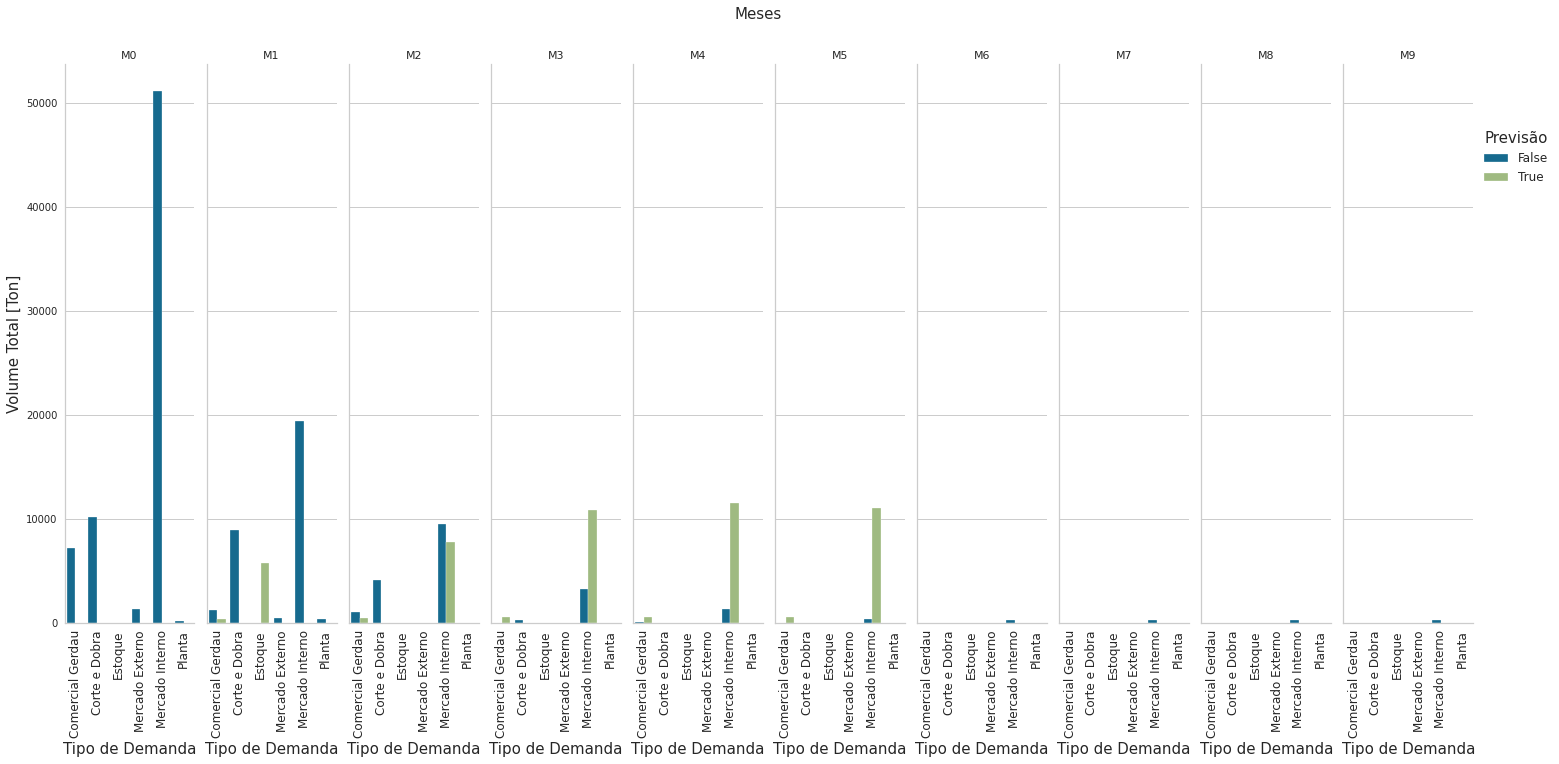

In [ ]:
# utilização de gráfico catplot pela facilidade de dividir em colunas e categorias da legenda e, possibilidade de ornenar o eixo x, para aproximar-se a imagem exemplo da questão.
# Note que a abscissa (x) é o "Tipo de Demanda" e a ordenada (y) "Volume Total [Ton]". 

sns.set_style("whitegrid") # fundo quadriculado do gráfico
g = sns.catplot(x="demand_type", # eixo x
                y="quantity", #  eixo y
                col="due_month", # divisão em coluna o eixo x 
                hue="predicted", # divisão da carteira em predita ou implantada (True/False).
                data=grafico, # base de dados
                kind="bar", # estilo do gráfico
                legend=False, # remove legenda automática
                order = ["Comercial Gerdau", "Corte e Dobra", "Estoque","Mercado Externo", "Mercado Interno", "Planta"]) # ordem dos tipos do eixo x interno
g.fig.subplots_adjust(top=0.9) # distância do topo
g.fig.suptitle('Meses',fontsize=15) #título do gráfico e tamanho da letra
g.set_axis_labels("Tipo de Demanda", "Volume Total [Ton]", fontsize=15) # título dos eixos e tamanho a letra
g.set_titles("{col_name}") # título das colunas, seleciona o nome que está na determinada linha
g.set_xlabels(fontsize=15) # tamanho da label do eixo x externo
g.set_xticklabels(fontsize=12) # tamanho da label do eixo x interno
g.set_ylabels(fontsize=15) # tamanho dos númeris do eixo y
g.figure.set_size_inches(20,10) # tamanho da figura
plt.legend(title = "Previsão", title_fontsize = 15,bbox_to_anchor = (1,0.9), loc=2, fontsize=12) # inserindo a legenda e sua posição
for ax in g.axes.flat: # condição para rotacionar a 90º as labels internas do eixo x
    for label in ax.get_xticklabels():
        label.set_rotation(90)

In [ ]:
# conclusão
print("No gráfico é possível observar que no mês M0 todas as demandas foram implantadas e no decorrer dos meses esse valor vai decrescendo, no mês M1 as demandas preditas aparecem mais em Estoque, e nos meses seguintes passam para o Mercado Interno. A partir do M6 as demandas estão com valores quase zerados.")

No gráfico é possível observar que no mês M0 todas as demandas foram implantadas e no decorrer dos meses esse valor vai decrescendo, no mês M1 as demandas preditas aparecem mais em Estoque, e nos meses seguintes passam para o Mercado Interno. A partir do M6 as demandas estão com valores quase zerados.


#Por que optamos pelo CATPLOT?
 
1)  É uma função ágil de se aplicar e pede menos sintaxe de código; <br>
2)  Ele é construído em cima do Matplotlib, outra bem requisitada biblioteca de visualização de dados no pandas;<br>
3) Para quem trabalha com dados que envolvem quaisquer variáveis categóricas, CATPLOT é o mais recomendável.<br>